# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 2</p>
## <p style="text-align: center;">Total points: **55**</p>
## <p style="text-align: center;">Due: Monday, **Sep 27** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 


**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Jessie Lee

EID: JYL787

Name:

EID:

# Question 1: Bias-Variance (5 pts)

a) (**2 pts**) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) (**3 pts**) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer:

a)This function represents the difference between estimated value by the model and the true value at certain point $x_0$ from the generator fuction. This is the bias of the estimator at $x_0$.

b) Bias describes how good the average model is, which is quantitatively how far off your modeled mean vs true mean of samples, where variance describes how sensitive the model is to variations in data. When a model is simple (in the Lasso or Ridge case, regularization is high), the bias is low but the variance is high, where each variable is given low weights; whereas for high complexity models (in the Lasso or Ridge case, regularization is low), for example overfit models, variance is low but the bias is high where training samples were all given high weight. Expected loss (E[L]) = $bias^2$ + variance + noise, so at low model complexity, E(L) is dominated by bias where at high complexity, E[L] is dominated by variance. What we need to do is to find the Goldilocks zone between the trade offs when we build our models.

# Question 2: Bias-Variance exploration (15 pts)

We want to build a model that can predict y for unknown inputs x. Please use **tmp.data.npy** data for this question.

a) (**10 pts**) Fit polynomial models of degrees 2, 4, 8 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

**You can use following codes to load the dataset**:


In [2]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

data_load = np.load('data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

## Answer:
# 2-a)

In [3]:
# Fit polynomial models of degrees 2, 4, 8 to the training data

poly2 = PolynomialFeatures(degree=2)
poly4 = PolynomialFeatures(degree=4)
poly6 = PolynomialFeatures(degree=6)

X_2_train = poly2.fit_transform(x_train)
X_4_train = poly4.fit_transform(x_train)
X_6_train = poly6.fit_transform(x_train)

X_2_test = poly2.fit_transform(x_test)
X_4_test = poly4.fit_transform(x_test)
X_6_test = poly6.fit_transform(x_test)

lrp2 = LinearRegression()
lrp2.fit(X_2_train, y_train)
y_2_train = lrp2.predict(X_2_train)
y_2_test = lrp2.predict(X_2_test)

lrp4 = LinearRegression()
lrp4.fit(X_4_train, y_train)
y_4_train = lrp4.predict(X_4_train)
y_4_test = lrp4.predict(X_4_test)


lrp6 = LinearRegression()
lrp6.fit(X_6_train, y_train)
y_6_train = lrp6.predict(X_6_train)
y_6_test = lrp6.predict(X_6_test)

# dt=dict({'y_test': y_test,
#     'poly2_pred': y_2_test,
#     'poly4_pred': y_4_test,
#     'poly6_pred': y_6_test})


df_train=pd.DataFrame(x_train)

df_train['y_train']   = y_train
df_train['y_2_train'] = y_2_train
df_train['y_4_train'] = y_4_train
df_train['y_6_train'] = y_6_train
df_train.columns=['x_train','y_train','y_2_train', 'y_4_train', 'y_6_train']
df_train.sort_values(by='x_train',inplace=True)

df_test=pd.DataFrame(x_test)

df_test['y_test'] = y_test
df_test['y_2_test'] = y_2_test
df_test['y_4_test'] = y_4_test
df_test['y_6_test'] = y_6_test
df_test.columns=['x_test','y_test','y_2_test', 'y_4_test', 'y_6_test']
df_test.sort_values(by='x_test',inplace=True)


ValueError: Expected 2D array, got 1D array instead:
array=[-3.50387597 -0.34108527  1.70542636  2.4496124   2.01550388 -2.13953488
 -1.27131783 -1.95348837 -0.09302326 -2.3875969   0.52713178 -3.56589147
 -2.63565891  2.51162791 -3.37984496 -1.02325581  3.75193798  1.58139535
 -3.87596899  1.76744186 -0.7751938   1.95348837 -2.51162791 -0.8372093
 -0.89922481 -1.51937984  3.50387597  0.21705426  0.09302326 -3.00775194
 -0.15503876  3.44186047 -3.19379845  0.71317829  0.8372093  -1.20930233
 -3.06976744  1.64341085  3.19379845  1.89147287 -3.81395349 -1.33333333
 -3.62790698  1.20930233 -0.65116279  2.13953488  1.82945736  3.00775194
 -0.21705426  2.69767442  0.40310078 -2.3255814  -2.88372093  2.63565891
 -3.31782946  3.68992248  2.82170543 -1.45736434  1.33333333 -0.27906977
 -3.9379845  -0.52713178  2.07751938  2.94573643 -1.39534884 -3.75193798
 -2.94573643 -1.64341085 -3.68992248 -0.71317829  3.31782946  2.26356589
 -4.         -1.89147287 -2.26356589 -0.58914729  0.65116279 -1.82945736
 -2.57364341  0.58914729 -2.07751938  1.27131783 -0.46511628  2.20155039
  2.88372093 -2.01550388  2.75968992 -3.13178295  1.51937984 -2.82170543
 -2.20155039 -0.96124031  2.57364341  1.08527132  3.87596899  4.
  0.89922481  0.27906977  0.96124031 -2.75968992].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [124]:
print('MSE for degree 2 polynomial on training data is: ', mse(y_train,y_2_train))
print('MSE for degree 4 polynomial on training data is: ', mse(y_train,y_4_train))
print('MSE for degree 6 polynomial on training data is: ', mse(y_train,y_6_train))
print('MSE for degree 2 polynomial on test data is: ', mse(y_test,y_2_test))
print('MSE for degree 4 polynomial on test data is: ', mse(y_test,y_4_test))
print('MSE for degree 6 polynomial on test data is: ', mse(y_test,y_6_test))

MSE for degree 2 polynomial on training data is:  8.63356886287906
MSE for degree 4 polynomial on training data is:  5.386282113264774
MSE for degree 6 polynomial on training data is:  5.278340904114266
MSE for degree 2 polynomial on test data is:  77.80097370911297
MSE for degree 4 polynomial on test data is:  31.299150556764587
MSE for degree 6 polynomial on test data is:  36.22029022850937


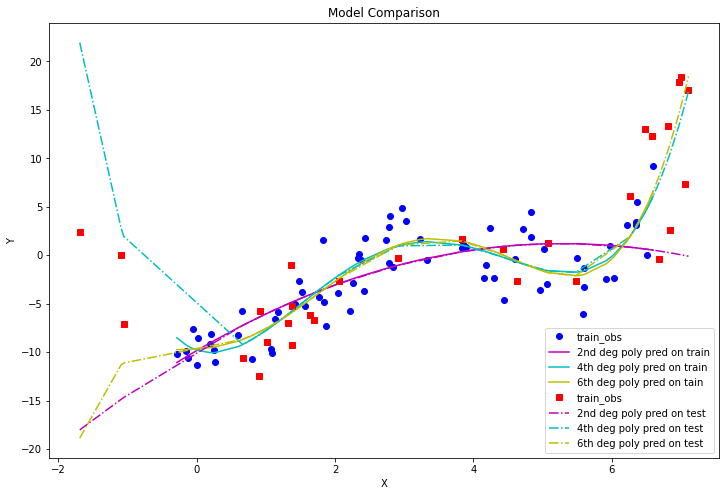

In [147]:
#Plot all model predictions vs. test data

ax = plt.gca()


# plt.plot(df_train['x_train'], df_train['y_train'], linestyle='None', marker= 'o', color='b',label='train')
# plt.plot(df_train['x_train'], df_train['y_2_train'], linestyle='-.', linewidth=6, marker='None', color='m',label='poly2_train')
# plt.plot(df_train['x_train'], df_train['y_4_train'], linestyle='-.', linewidth=6, marker='None', color='c',label='poly4_train')
# plt.plot(df_train['x_train'], df_train['y_6_train'], linestyle='-.', linewidth=6, marker='None', color='b',label='poly6_train')


# plt.plot(df_test['x_test'], df_test['y_test'], linestyle='None', marker= 's', color='r',label='train')
# plt.plot(df_test['x_test'], df_test['y_2_test'], linestyle='-', linewidth=4, marker='None', color='y',label='poly2_test')
# plt.plot(df_test['x_test'], df_test['y_4_test'], linestyle='-', linewidth=4, marker= 'None', color='g',label='poly4_test')
# plt.plot(df_test['x_test'], df_test['y_6_test'], linestyle='-', linewidth=4, marker='None', color='purple',label='poly6_test')

ax.plot(df_train['x_train'], df_train['y_train'],linestyle='None',marker= 'o', color='b',label='train_obs')
ax.plot(df_train['x_train'], df_train['y_2_train'],linestyle='-',color='m',label='2nd deg poly pred on train')
ax.plot(df_train['x_train'], df_train['y_4_train'],linestyle='-',color='c',label='4th deg poly pred on train')
ax.plot(df_train['x_train'], df_train['y_6_train'],linestyle='-',color='y',label='6th deg poly pred on tain')

ax.plot(df_test['x_test'], df_test['y_test'],linestyle='None',marker= 's', color='r',label='train_obs')
ax.plot(df_test['x_test'], df_test['y_2_test'],linestyle='-.',color='m',label='2nd deg poly pred on test')
ax.plot(df_test['x_test'], df_test['y_4_test'],linestyle='-.',color='c',label='4th deg poly pred on test')
ax.plot(df_test['x_test'], df_test['y_6_test'],linestyle='-.',color='y',label='6th deg poly pred on test')


ax.set_xscale('linear')
ax.set_xlim(ax.get_xlim()[::1])  # normal direction 
plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Model Comparison')
ax.legend()
plt.axis('tight')
plt.show()


# 2- b)

As expected, for training data, 6th degree polynomial model gives the best result based on MSE, because when increasing model complexity and test the error on the data that was used to fit the model, you always get tighter 'fit' give you lower MSE with no penalty for overfitting. However, when you test your model with test data. you will see a trade off between bias and variance, when you look at the loss function loss (E[L]) = $bias^2$ + variance + noise, where when you cross the optimal complexity and complexity is too high for the given sample size, increased variance will increase with complexity resulting in higher predition error. For our case, 2nd degree and 6th degree polynomial fit gave higher MSE than 4th degree polynomial, which indicate that 4th degree polynomial fit is close to the optimal degree of model complexity for our data.

# Question 3: Gradient descent (5 pts)

a) (**2 pts**) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b) (**3 pts**) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:

# 3 a)

In both gradient descent (GD) and stochastic gradient descent (SGD), a set of model parameters are updated iteratively to minimize an error function. While in GD, you have to run through ALL the samples in your training set to do a single update for a parameter in a particular iteration, in SGD, on the other hand, you use ONLY ONE or SUBSET of training sample from your training set to do the update for a parameter in a particular iteration. Thus, if the number of training samples are large, using gradient descent may take too long because in every iteration when you are updating the values of the parameters, you are running through the complete training set. On the other hand, using SGD will be faster because you use only one training sample and it starts improving itself right away from the first sample.SGD often converges much faster compared to GD but the error function is not as well minimized as in the case of GD. Often in most cases, the close approximation that you get in SGD for the parameter values are enough because they reach the optimal values and keep oscillating there.

# 3 b)

# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:

# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        
    def sgd(self, gradient):
        self.coef # = please put your codes here to update the self.coef using SGD
    
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                   #please put your codes here

                # Compute gradients
                    #please put your codes here
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
      #compute the dot product of self.coef and X
      return None #this line is just a placeholder, please delete this line in your code        

In [ ]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

## Answer: